In [ ]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,fec_hos_,condicion_final,fecha_defuncion,fecha_nacimiento,certif_defuncion,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,NaN,1,NaN,12/11/1994,NaN,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,NaN,1,NaN,9/02/1995,NaN,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,NaN,1,NaN,19/09/1961,NaN,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,NaN,1,NaN,6/10/1990,NaN,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,10/01/2020,1,NaN,12/02/1963,NaN,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,1,9996,Contributivo,EPS013,2,2,2,2,2,2,2,2,6/03/2020,3/03/2020,2,NaN,1,NaN,3/03/1984,NaN,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,1,2145,Contributivo,EPS017,2,2,2,2,2,2,2,2,13/03/2020,6/03/2020,1,13/03/2020,1,NaN,3/07/1977,NaN,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,1,9998,Contributivo,EPS013,2,2,2,2,2,2,2,2,8/03/2020,4/03/2020,2,NaN,1,NaN,3/08/2017,NaN,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,1,9997,Contributivo,EPS016,2,2,2,2,2,2,2,2,11/03/2020,5/03/2020,2,NaN,1,NaN,16/02/2008,NaN,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
pd.set_option('display.max_columns', None)
df.head(10)

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,cod_ase_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,fecha_contagio,inicio_sintomas,pac_hos_,fec_hos_,condicion_final,fecha_defuncion,fecha_nacimiento,certif_defuncion,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,1,2411,Contributivo,EPS037,2,2,2,2,1,2,2,2,17/01/2020,10/01/2020,2,NaN,1,NaN,12/11/1994,NaN,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,1,9997,Contributivo,EPS003,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,2,NaN,1,NaN,9/02/1995,NaN,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,1,9999,Contributivo,EPS013,2,2,2,2,2,2,2,2,12/01/2020,8/01/2020,2,NaN,1,NaN,19/09/1961,NaN,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,1,4121,Contributivo,EPS013,2,2,2,2,2,2,2,2,10/01/2020,6/01/2020,2,NaN,1,NaN,6/10/1990,NaN,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,1,9210,Especial,37086,2,2,2,2,2,2,2,2,10/01/2020,7/01/2020,1,10/01/2020,1,NaN,12/02/1963,NaN,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
5,6,25/01/2020,1,2020,45,1,F,170,68,276,1,5121,Contributivo,EPS016,2,2,2,2,2,2,2,2,16/01/2020,8/01/2020,2,NaN,1,NaN,6/04/1974,NaN,2,1,1,2,1,1,2,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.073368,-73.088821
6,7,16/01/2020,1,2020,46,1,F,170,68,276,1,7732,Subsidiado,68000,2,2,2,2,2,2,2,2,13/01/2020,11/01/2020,1,13/01/2020,1,NaN,29/09/1973,NaN,2,1,1,2,1,1,1,1,2,1,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.080947,-73.089188
7,8,9/01/2020,1,2020,27,1,F,170,68,276,1,2221,Contributivo,EPS005,2,2,2,2,2,2,2,1,9/01/2020,7/01/2020,2,NaN,1,NaN,10/08/1992,NaN,1,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.084087,-73.085953
8,9,15/01/2020,1,2020,8,2,F,170,68,276,1,9999,Subsidiado,68000,2,2,2,2,2,2,2,2,12/01/2020,11/01/2020,1,12/01/2020,1,NaN,17/04/2019,NaN,2,1,2,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2. Hospitalizacion piso,7.083333,-73.102295
9,10,7/01/2020,1,2020,2,1,M,170,68,276,1,9997,Contributivo,EPS013,2,2,2,2,2,2,2,2,7/01/2020,7/01/2020,2,NaN,1,NaN,7/06/2017,NaN,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067431,-73.097923


In [ ]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,area_,ocupacion_,tip_ss_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,fecha_nacimiento,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,1,2411,Contributivo,2,2,2,2,1,2,2,2,2,1,12/11/1994,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,1,9997,Contributivo,2,2,2,2,2,2,2,2,2,1,9/02/1995,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,1,9999,Contributivo,2,2,2,2,2,2,2,2,2,1,19/09/1961,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,1,4121,Contributivo,2,2,2,2,2,2,2,2,2,1,6/10/1990,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,1,9210,Especial,2,2,2,2,2,2,2,2,1,1,12/02/1963,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,1,9996,Contributivo,2,2,2,2,2,2,2,2,2,1,3/03/1984,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,1,2145,Contributivo,2,2,2,2,2,2,2,2,1,1,3/07/1977,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,1,9998,Contributivo,2,2,2,2,2,2,2,2,2,1,3/08/2017,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,1,9997,Contributivo,2,2,2,2,2,2,2,2,2,1,16/02/2008,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [ ]:
df = df.drop(['fec_hos_', 'fecha_defuncion', 'certif_defuncion', 'ID', 'fec_not', 'año', 'cod_pais_o', 'cod_dpto_o', 'cod_mun_o', 'ocupacion_', 'cod_ase_', 'fecha_contagio', 'inicio_sintomas', 'fecha_nacimiento'], axis=1)
df

,semana,edad_,uni_med_,sexo_,area_,tip_ss_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,25,1,F,1,Contributivo,2,2,2,2,1,2,2,2,2,1,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,1,24,1,M,1,Contributivo,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,1,58,1,M,1,Contributivo,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,1,29,1,F,1,Contributivo,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,1,56,1,F,1,Especial,2,2,2,2,2,2,2,2,1,1,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36,1,F,1,Contributivo,2,2,2,2,2,2,2,2,2,1,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,9,42,1,M,1,Contributivo,2,2,2,2,2,2,2,2,1,1,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,9,2,1,M,1,Contributivo,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,9,12,1,F,1,Contributivo,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
df['sexo_'] = df['sexo_'].replace({'F': 0, 'M': 1})
df

,semana,edad_,uni_med_,sexo_,area_,tip_ss_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,25,1,0,1,Contributivo,2,2,2,2,1,2,2,2,2,1,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,1,24,1,1,1,Contributivo,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,1,58,1,1,1,Contributivo,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,1,29,1,0,1,Contributivo,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,1,56,1,0,1,Especial,2,2,2,2,2,2,2,2,1,1,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36,1,0,1,Contributivo,2,2,2,2,2,2,2,2,2,1,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,9,42,1,1,1,Contributivo,2,2,2,2,2,2,2,2,1,1,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,9,2,1,1,1,Contributivo,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,9,12,1,0,1,Contributivo,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
df_copia = pd.DataFrame(df)

# Aplicar get_dummies para crear columnas binarias
ocupaciones_dummies = pd.get_dummies(df['tip_ss_'])

# Concatenar las columnas binarias al DataFrame original
df_copia = pd.concat([df_copia, ocupaciones_dummies], axis=1)

# Reemplazar NaN (no hay coincidencia) con 0
#df_copia = df_copia.fillna(0)

# Eliminar la columna original de ocupación
df_copia.drop('tip_ss_', axis=1, inplace=True)

#print(df_copia)

# Aplicar get_dummies para crear columnas binarias
ocupaciones_dummies = pd.get_dummies(df['conducta'])

# Concatenar las columnas binarias al DataFrame original
df_copia = pd.concat([df_copia, ocupaciones_dummies], axis=1)

df_copia.drop('conducta', axis=1, inplace=True)

In [ ]:
df_copia

,semana,edad_,uni_med_,sexo_,area_,gp_discapa,gp_desplaz,gp_migrant,gp_carcela,gp_gestan,gp_calle,gp_psiquia,gp_vic_vio,pac_hos_,condicion_final,familiar_sintomas,fiebre,cefalea,dolor_retroocular,mialgias,artralgia,erupcion,dolor_abdomen,vomito,diarrea,somnolencia,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,latitud,longitud,Contributivo,Especial,No asegurado,Particular,Subsidiado,1. Ambulatorio,2. Hospitalizacion piso,3. UCI,4. Observacion
0,1,25,1,0,1,2,2,2,2,1,2,2,2,2,1,2,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,7.076011,-73.102501,1,0,0,0,0,1,0,0,0
1,1,24,1,1,1,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,7.079495,-73.105400,1,0,0,0,0,1,0,0,0
2,1,58,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,1,2,2,2,2,2,2,2,2,7.090290,-73.091003,1,0,0,0,0,1,0,0,0
3,1,29,1,0,1,2,2,2,2,2,2,2,2,2,1,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,7.067435,-73.090958,1,0,0,0,0,1,0,0,0
4,1,56,1,0,1,2,2,2,2,2,2,2,2,1,1,1,1,1,2,1,2,2,2,1,1,2,2,2,2,2,1,2,2,7.066905,-73.104980,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,9,36,1,0,1,2,2,2,2,2,2,2,2,2,1,2,1,1,1,1,1,2,2,1,2,2,2,2,1,2,2,2,2,7.072610,-73.099487,1,0,0,0,0,1,0,0,0
1258,9,42,1,1,1,2,2,2,2,2,2,2,2,1,1,2,1,1,2,1,1,2,2,2,2,2,2,2,2,2,1,2,1,7.065252,-73.103607,1,0,0,0,0,0,1,0,0
1259,9,2,1,1,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,7.091391,-73.103264,1,0,0,0,0,1,0,0,0
1260,9,12,1,0,1,2,2,2,2,2,2,2,2,2,1,2,1,1,2,1,2,1,2,2,2,2,2,2,2,2,2,2,2,7.061083,-73.097000,1,0,0,0,0,1,0,0,0


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_copia)
scaled_features[:5]

array([[-1.75926067, -0.26531106, -0.19149921, -1.04208945, -0.12743403,
         0.08475117,  0.07987231,  0.13008396,  0.03984095, -7.18215381,
         0.02816064,  0.07987231,  0.09377081,  0.49454619,  0.        ,
         0.36309581, -0.03984095,  2.47587227, -1.05206689, -0.42620176,
        -0.60114956, -0.87043677,  0.42879472,  0.41707732,  0.34753637,
         0.11685298,  0.09797959,  0.06306921,  0.15336189,  0.04881438,
         0.32415862,  0.09797959,  0.17135864, -0.15098307, -0.9022805 ,
         0.58528044, -0.20937498, -0.08475117, -0.13624741, -0.4808529 ,
         0.59382315, -0.47835323, -0.04881438, -0.27876757],
       [-1.75926067, -0.31429754, -0.19149921,  0.95961052, -0.12743403,
         0.08475117,  0.07987231,  0.13008396,  0.03984095,  0.139234  ,
         0.02816064,  0.07987231,  0.09377081,  0.49454619,  0.        ,
         0.36309581, -0.03984095, -0.40389806,  0.95050991, -0.42620176,
         1.66347954,  1.14884853,  0.42879472,  0.41707732,  0.

In [ ]:
kmeans = KMeans(
  init="random",
  n_clusters=3,
  n_init=10,
  max_iter=300,
  random_state=42
)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

47873.083892823255

In [ ]:
kmeans.cluster_centers_

array([[ 2.71700786e-02,  4.13138223e-02, -2.57220589e-02,
         2.84874945e-02, -9.90863808e-03, -1.71480580e-02,
        -2.81650469e-02,  1.27806680e-02, -1.40489536e-02,
         9.21511197e-02, -9.93017063e-03, -1.46603778e-02,
        -1.00047785e-02,  4.64875644e-01,  0.00000000e+00,
        -5.45341305e-02, -1.28960000e-02, -5.20290138e-02,
        -1.96559163e-02, -2.50349560e-02, -7.20079299e-02,
        -7.18126797e-02,  3.51856099e-01,  3.17521506e-01,
         2.05819053e-01,  1.07555427e-01,  8.69354452e-02,
         6.30692060e-02,  1.17596156e-01,  4.88143783e-02,
         2.98581472e-01,  9.79795897e-02,  1.58481746e-01,
         2.85029853e-02, -2.58211797e-02,  1.67320391e-01,
        -6.32160097e-03, -2.10641537e-02, -1.60571186e-02,
        -1.73484209e-01,  5.66967754e-01, -4.64586569e-01,
        -4.88143783e-02, -2.53905927e-01],
       [-7.82651452e-02, -1.25113572e-01,  7.53778485e-02,
        -7.80805643e-02,  2.95308632e-02,  4.82971921e-02,
         7.98

In [ ]:
kmeans.n_iter_

14

In [ ]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 10,
  "max_iter": 300,
  "random_state": 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

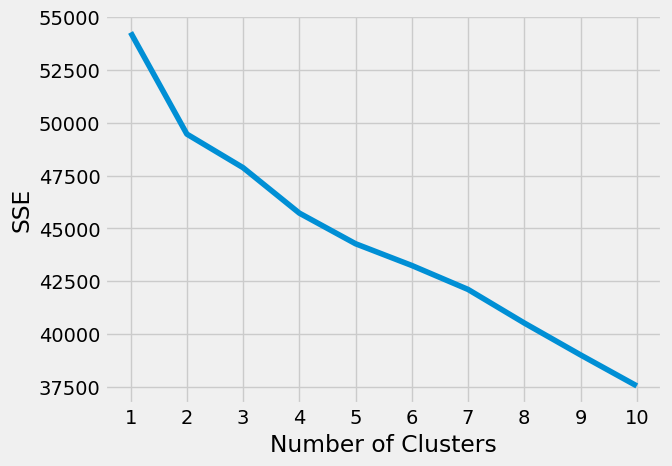

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
  range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

4

In [ ]:
silhouette_coefficients = []

#Aquí se inicia con 2 cluester
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

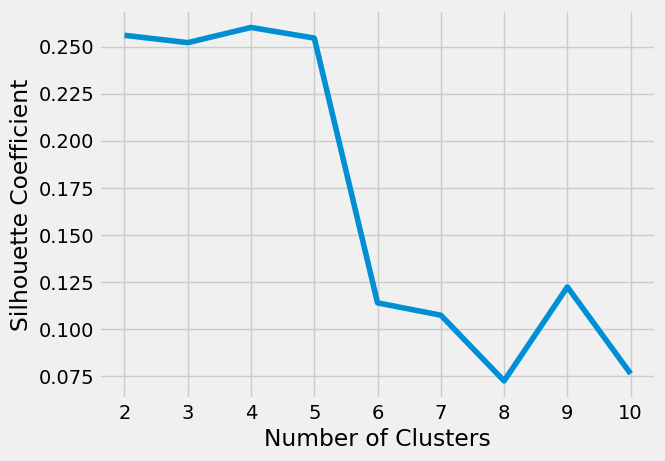

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
#df = pd.DataFrame(data)

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copia)

# Basado en el método del codo, selecciona el número óptimo de clusters
optimal_clusters = 4  # Reemplaza con el número óptimo que encuentres en el gráfico

# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_features)

df_copia['Cluster'] = kmeans.labels_

for cluster in range(optimal_clusters):
    print(f'Grupo {cluster}:')
    print(df_copia[df_copia['Cluster'] == cluster])

Grupo 0:
      semana  edad_  uni_med_  sexo_  area_  gp_discapa  gp_desplaz  \
4          1     56         1      0      1           2           2   
6          1     46         1      0      1           2           2   
8          1      8         2      0      1           2           2   
11         1     10         1      0      1           2           2   
12         1      9         1      1      1           2           2   
...      ...    ...       ...    ...    ...         ...         ...   
1248       9     27         1      0      1           2           2   
1249       9     20         1      1      1           2           2   
1250       9     19         1      0      1           2           2   
1258       9     42         1      1      1           2           2   
1261       9     14         1      1      1           2           2   

      gp_migrant  gp_carcela  gp_gestan  gp_calle  gp_psiquia  gp_vic_vio  \
4              2           2          2         2           2

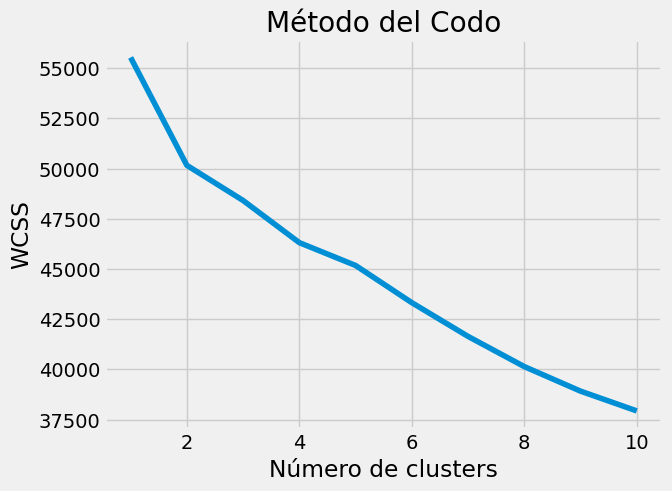

Coeficiente de silueta: 0.26237765972351534
Grupo 0:
      semana  edad_  uni_med_  sexo_  area_  gp_discapa  gp_desplaz  \
0          1     25         1      0      1           2           2   
1          1     24         1      1      1           2           2   
2          1     58         1      1      1           2           2   
3          1     29         1      0      1           2           2   
5          1     45         1      0      1           2           2   
...      ...    ...       ...    ...    ...         ...         ...   
1255       9     71         1      1      1           2           2   
1256       9     49         1      0      1           2           2   
1257       9     36         1      0      1           2           2   
1259       9      2         1      1      1           2           2   
1260       9     12         1      0      1           2           2   

      gp_migrant  gp_carcela  gp_gestan  gp_calle  gp_psiquia  gp_vic_vio  \
0              2 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {
    'Feature1': [2, 3, 4, 7, 8, 9, 12, 13, 14, 17],
    'Feature2': [1, 2, 3, 4, 6, 7, 8, 10, 11, 12]
}

#df = pd.DataFrame(data)

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copia)

# Encontrar el número óptimo de clusters utilizando el método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')  # Within-Cluster-Sum-of-Squares
plt.show()

# Basado en el método del codo, selecciona el número óptimo de clusters
optimal_clusters = 4  # Reemplaza con el número óptimo que encuentres en el gráfico

# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)

# Añadir las etiquetas de cluster al DataFrame original
df_copia['Cluster'] = kmeans.labels_

# Calcular el coeficiente de silueta
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f'Coeficiente de silueta: {silhouette_avg}')

# Imprimir los grupos
for cluster in range(optimal_clusters):
    print(f'Grupo {cluster}:')
    print(df_copia[df_copia['Cluster'] == cluster])